In [1]:
# Here I would like to build an unsupervised Machine Learning Model using scikit-learn

# Importing the libraries
import numpy as np
import pandas as pd
import sklearn as sk

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3016\2132677067.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


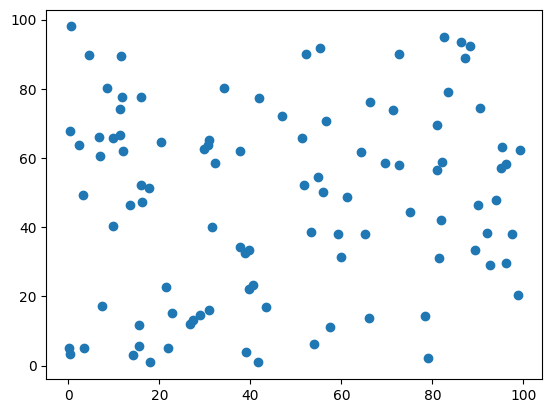

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3016\417998241.py:52: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = kde.gaussian_kde([x,y])


[[0.03874911 0.03887441 0.03898883 ... 0.01986457 0.01953034 0.01919759]
 [0.03925246 0.03937906 0.03949463 ... 0.02030108 0.01996091 0.01962219]
 [0.03975393 0.03988182 0.03999854 ... 0.02074075 0.02039466 0.02005001]
 ...
 [0.05642325 0.05716885 0.05791276 ... 0.13759848 0.13654452 0.13547086]
 [0.0556589  0.05639476 0.05712894 ... 0.13640906 0.13536767 0.1343067 ]
 [0.0548891  0.05561514 0.05633951 ... 0.13518241 0.13415383 0.13310579]]


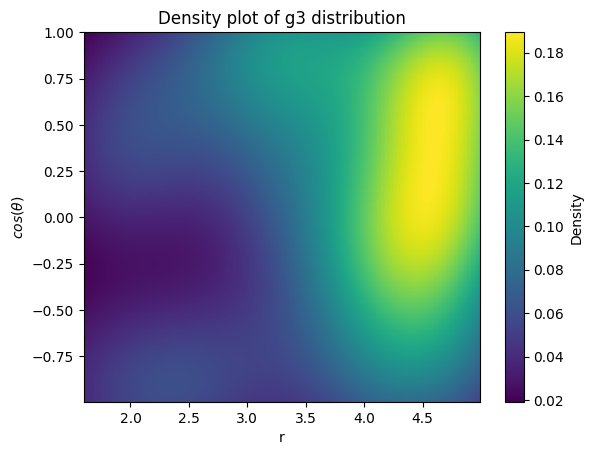

In [2]:
#To quantify local structure, we used the mixed,radial angular,three-particle distribution function, g3(r,θ), which is defined as the probability of finding a particle at a distance r from a reference particle at an angle θ.
# for each point in the coordinates B, we find the nearest neighbor A, and an atom C that is in the cutoff range. 
#We then calculate the angle between the vectors AB and AC. 
#we have the coordinates in the form [[x1,y1,z1] , [x2,y2,z2], ... , [xn,yn,zn]

#lets create random points on 2D plane using numpy and plot them
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from scipy.stats import kde

def random_points(n):
    points = []
    for i in range(n):
        x = random.uniform(0, 100)
        y = random.uniform(0, 100)
        points.append([x,y])
    return points

def plot_points(points):
    x = [i[0] for i in points]
    y = [i[1] for i in points]
    plt.scatter(x, y)
    plt.show()

def g3_distribution(com_coordinates,cut_off_radius): 
    r=[]
    cos_theta=[]
    for B in com_coordinates:
        #an array with all coordinates except the current one
        other_coordinates = [i for i in com_coordinates if i != B]
        dist = [np.linalg.norm(np.array(B) - np.array(i)) for i in other_coordinates]
        #find min index
        min_index = dist.index(min(dist))
        A = other_coordinates[min_index]
        
        other_coordinates.remove(A)
        #find the atom C in the cutoff range
        C = [i for i in other_coordinates if np.linalg.norm(np.array(B) - np.array(i)) < cut_off_radius]
        if C:
            #calculate the angle between the vectors AB and AC
            AB = np.array(B) - np.array(A)
            AC = np.array(B) - np.array(C)
            for i in range(len(AC)):
                r.append(np.linalg.norm(AC[i]))
                cos_theta.append(np.dot(AB,AC[i])/(np.linalg.norm(AB)*np.linalg.norm(AC[i])))
    #plot density plot
    x = np.array(r)
    y = np.array(cos_theta)
    nbins=300
    k = kde.gaussian_kde([x,y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    # Make the plot
    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
    print(zi.reshape(xi.shape))
    #adding color bar with min and max written on top and bottom
    plt.colorbar(label='Density')
    plt.title('Density plot of g3 distribution')
    plt.xlabel('r')
    plt.ylabel('$cos(\\theta)$')
    plt.show()



coords=random_points(100)
plot_points(coords)
g3_distribution(coords,5)

In [6]:
#Calculating SSIM using scikit-image
#import scikit-image
import numpy as np
from skimage.metrics import structural_similarity
def SSIM_skimage(dist_1,dist_2):
    return structural_similarity(dist_1,dist_2,data_range=dist_2.max()-dist_2.min(),win_size=7)
# an example of how to use the function
#SSIM_skimage(dist_1,dist_2)
#two 2D distributions with values between 0 and 1
dist_1 = np.random.rand(10,10)
dist_2 = np.random.rand(10,10)
SSIM_skimage(dist_1,dist_2)


0.09700025166483262

In [ ]:
# Load the data from csv file called "g3_dist.csv"
bins_r=401
bins_theta=201
cut_off_r=2
xi, yi = np.mgrid[0:cut_off_r:bins_r*1j, -1:1:bins_theta*1j] # this creates a grid of points
data = pd.read_csv("g3_dist.csv")
data = data.to_numpy()
plt.colorbar()
#plt.title('Density plot of g3 distribution')
plt.xlabel('r/$\\sigma$')
plt.ylabel('$cos(\\theta)$')

def plot_dist():
    plt.pcolormesh(xi, yi, zi, shading='auto')
    plt.colorbar(label='Density')
    plt.title('Density plot of g3 distribution')
    plt.xlabel('r')
    plt.ylabel('$cos(\\theta)$')
    plt.show()

#data file has multiple colomns, we read each one
SSIM_mat=np.zeros((len(data[0]),len(data[0])))
for i in range(0,len(data[0])):
    zi1 = np.reshape(data[1:,i], xi.shape)
    for j in range(0,len(data[0])):
        zi2 = np.reshape(data[1:,j], xi.shape)
        SSIM_mat[i,j]=SSIM_skimage(zi1,zi2)

print(SSIM_mat)


N x N similarity matrix for all distributions

In [41]:
# #Now to consctruct the similarity matrix for N distributions
# #The similarity matrix is a matrix that contains the similarity between each pair of distributions
# #The similarity between two distributions can be calculated using the SSIM function

# def similarity_matrix(distributions):
#     N = len(distributions)
#     sim_matrix = np.zeros((N,N))
#     for i in range(N):
#         for j in range(N):
#             sim_matrix[i,j] = (SSIM_skimage(distributions[i],distributions[j])+1)/2
#     return sim_matrix

# #An example of how to use the function
# #similarity_matrix([dist_1,dist_2,dist_3])
# dist_1 = np.random.rand(10,10)
# dist_2 = np.random.rand(10,10)
# dist_3 = np.random.rand(10,10)
# s = similarity_matrix([np.random.rand(10,10) for i in range(100)])

# create a matrix with diagonal elements equal to 1 and two blocks of 1s on the off-diagonal
# the matrix is symmetric
A=np.zeros((100,100))
for i in range(100):
    for j in range(100):
        if i==j:
            A[i,j]=1
        elif i<50 and j<50:
            A[i,j]=1
        elif i>=50 and j>=50:
            A[i,j]=1
#A is the similarity matrix
print(A)


[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


In [42]:
#Now I want to use the similarity matrix to cluster the distributions
#using DBSCAN algorithm from scikit-learn
from sklearn.cluster import DBSCAN
def cluster_distributions(similarity_matrix,eps,min_samples):
    clustering = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed').fit(1-similarity_matrix)
    return clustering.labels_

#An example of how to use the function
cluster_distributions(A,0.5,2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


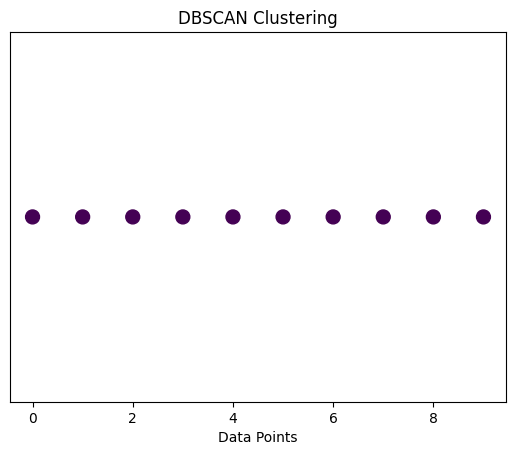

In [33]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Generate a random similarity matrix (replace this with your actual similarity matrix)
similarity_matrix = np.random.rand(10, 10)

# Convert similarity matrix to distance matrix
distance_matrix = 1 - similarity_matrix

# Instantiate DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)

# Fit the model to the distance matrix
dbscan.fit(distance_matrix)

# Accessing the cluster labels
labels = dbscan.labels_
print(labels)
# Visualize the clusters
plt.scatter(range(len(labels)), [0] * len(labels), c=labels, cmap='viridis', s=100)
plt.yticks([])
plt.xlabel('Data Points')
plt.title('DBSCAN Clustering')
plt.show()


ValueError: 'c' argument has 1 elements, which is inconsistent with 'x' and 'y' with size 10.

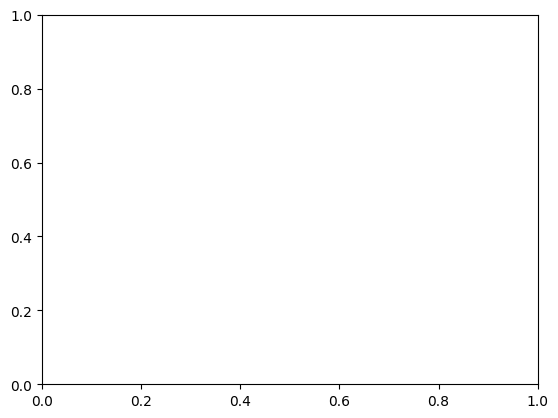

In [24]:
#Now to visualize the clusters
import matplotlib.pyplot as plt
def plot_clusters(distributions,labels):
    N = len(distributions)
    for i in range(N):
        plt.scatter(distributions[i][:,0],distributions[i][:,1],c=labels[i])
    plt.show()

#An example of how to use the function
plot_clusters([np.random.rand(10,2) for i in range(100)],cluster_distributions(s,0.5,2))

[ 1  0  1  1 -1  1  2  0 -1  0  0  0  0  0  0 -1 -1 -1  2 -1 -1  0  2 -1
  1  2 -1  1 -1  3  3  0  3  3  2  1 -1  3 -1  2 -1  2 -1  2  2  0  3  2
  1 -1 -1  3  2 -1 -1  0  0  3  3  0  0  3  3 -1  3  0  2  2  3  1  0  3
  1  0  1 -1 -1  2  3  3 -1 -1  2 -1  3  2  3  3  1  1  1  2 -1  2  2  0
  0  2  0 -1]


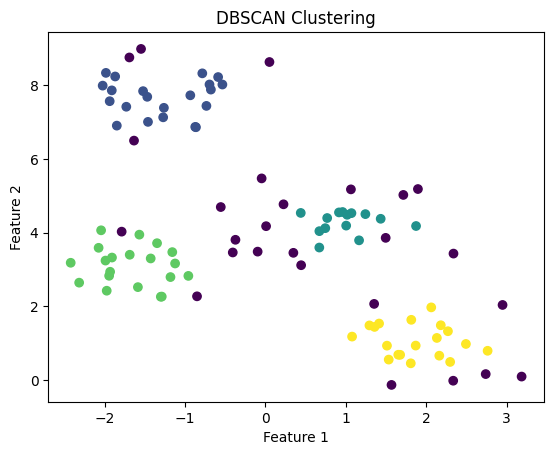

In [37]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, _ = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

# Instantiate DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model to the data
dbscan.fit(X)

# Accessing the cluster labels
labels = dbscan.labels_
print(labels)
# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()


In [21]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0
y = mnist.target

In [37]:
# Select 10000 random points
np.random.seed(42)  # For reproducibility
indices = np.random.choice(range(X.shape[0]), size=10000, replace=False)
X_subset = X.iloc[indices]
y_subset = y.iloc[indices]

[46730 48393 41416 ... 59195 12633 39641]


In [26]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_subset)

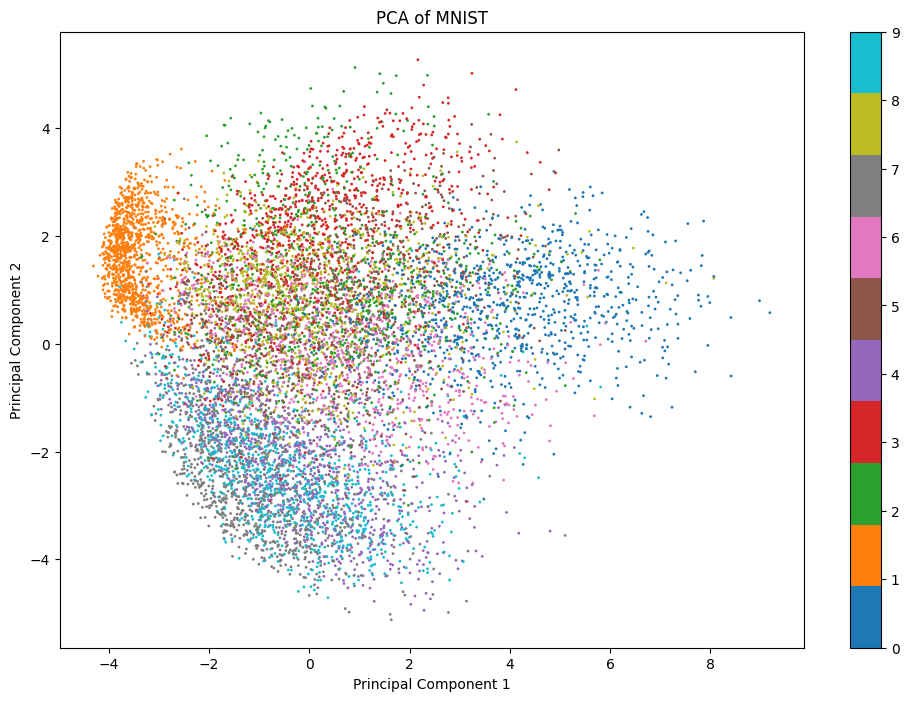

In [27]:
# Plotting with Matplotlib
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_subset.astype(int), cmap='tab10', s=1)
plt.colorbar(scatter)
plt.title('PCA of MNIST')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [28]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_subset)

In [38]:
print(X_tsne)

[[ -8.333245   15.28813  ]
 [ -1.0517446 -24.812382 ]
 [  9.558046   22.50926  ]
 ...
 [ 10.410067   62.151695 ]
 [ 39.323532   51.44707  ]
 [  2.5943046  40.855995 ]]


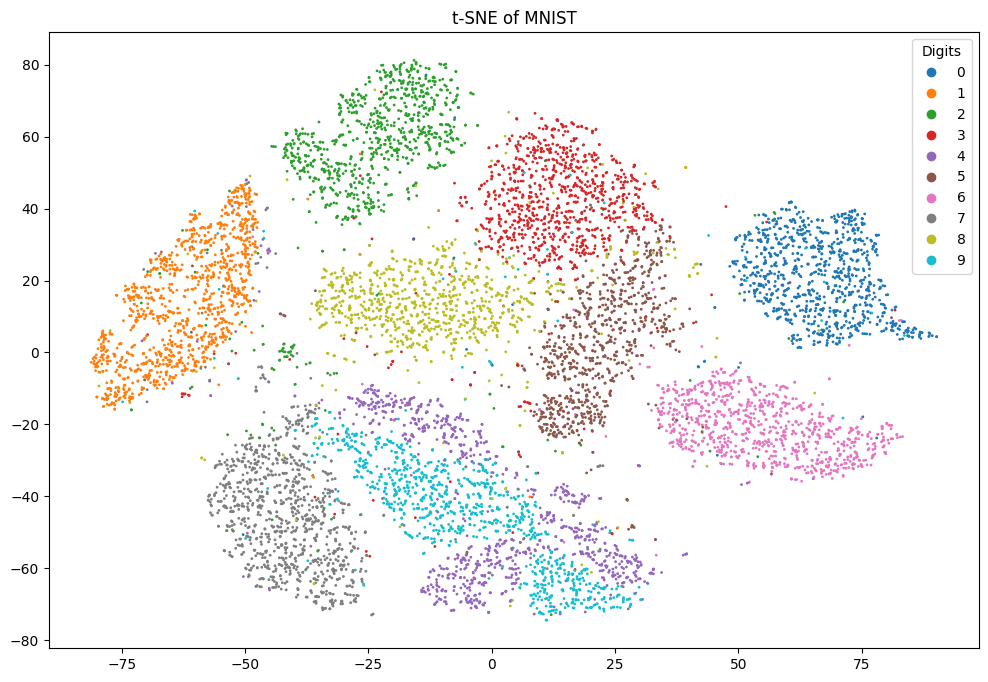

In [31]:
# Plot the result
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset.astype(int), cmap='tab10', s=1)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('t-SNE of MNIST')
plt.show()